# TP - Utilisation d'API externes

On a vu que la programmation objet permettait *d'encapsuler* tous les comportements d'un objet au sein d'une classe. Dans un contexte de développement de grosses applications, c'est particulièrement important : un développeur crée un objet plus ou moins complexe qui sera utilisé dans un programme et d'autres développeur n'ont plus qu'à l'utiliser avec les attributs et méthodes fournies dans la documentation (c'est à dire l'interface).
Dans le même esprit objet/interface d'accès, de nombreuses applications proposent des interfaces de programmation qui permettent d'accéder simplement à leurs fonctionnalités. Ce sont les API (Application Programming Interface).
Nous allons voir l'utilisation de deux d'entre elles : openweathermap et l'API de la station spatiale internationale.



## 1- Une API pour localiser l'ISS
La station spatiale internationale ou ISS (voir https://www.nasa.gov/mission_pages/station/main/index.html ou https://fr.wikipedia.org/wiki/Station_spatiale_internationale ) est en orbite autour de la terre et une API publique permet de déterminer en temps réel sa position ainsi que les astronautes présents à bord.

Cette partie du TP est inspirée de https://www.dataquest.io/blog/python-api-tutorial/ qui explique un peu plus en détail qu'ici comment interroger cette API.

Vous pouvez également consulter http://api.open-notify.org/ qui est la documentation officielle de l'API.

Comme pour openweathermap, on interroge l'api qui nous retourne un objet request de type JSON qu'il ne reste plus qu'à "parser" pour en extraire les données pertinentes.

In [ ]:
import requests
import json

response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)   #renvoie 200 si la requete a fonctionné
print(response.json())        #renvoie la réponse sous forme de JSON

### Exercice 1
Créer un script qui affiche un texte simple disant combien de personnes se trouvent dans l'ISS et leur nom.
***

Une autre requête possible avec cette API est de demander la position actuelle de l'ISS. Voici un exemple de requête :

In [6]:
import requests
import json

response = requests.get("http://api.open-notify.org/iss-now.json")
print(response.status_code)   #renvoie 200 si la requete a fonctionné
print(response.json())        #renvoie la réponse sous forme de JSON


200
{'message': 'success', 'timestamp': 1663889584, 'iss_position': {'longitude': '-163.5683', 'latitude': '-23.9263'}}


Le paramètre <code>risetime</code> est un timestamp, c'est à dire une date exprimée sous la forme du nombre de secondes écoulées depuis le 1er janvier 1970 0h00 UTC. Pour rendre ce timestamp plus intelligible, on peut utiliser la bibliothèque datetime.

In [8]:
from datetime import datetime

timestamp=1601728696
time = datetime.fromtimestamp(timestamp)
print(f"le timestamp {timestamp} correspond à {time} UTC")

le timestamp 1601728696 correspond à 2020-10-03 08:38:16


### Exercice 2
Créer un script qui affiche un texte simple affichant la position actuelle de l'ISS et sa distance par rapport à Montréal. On pourra s'aider de https://stackoverflow.com/questions/365826/calculate-distance-between-2-gps-coordinates pour calculer la distance entre deux coordonnées gps.
***

***

## 2- Deux bibliothèques pour afficher des cartes
Il existe de nombreuses librairies Python permettant d'afficher des cartes géographiques. Nous allons regarder deux d'entre elles et vous choisirez celle que vous préférez pour une utilisation dans un exercices et un projet.

### Cartopy
Cartopy est un package permettant de réaliser des projections cartographiques. Il s'intègre aux visualisations de Matplotlib.

Voici un exemple :

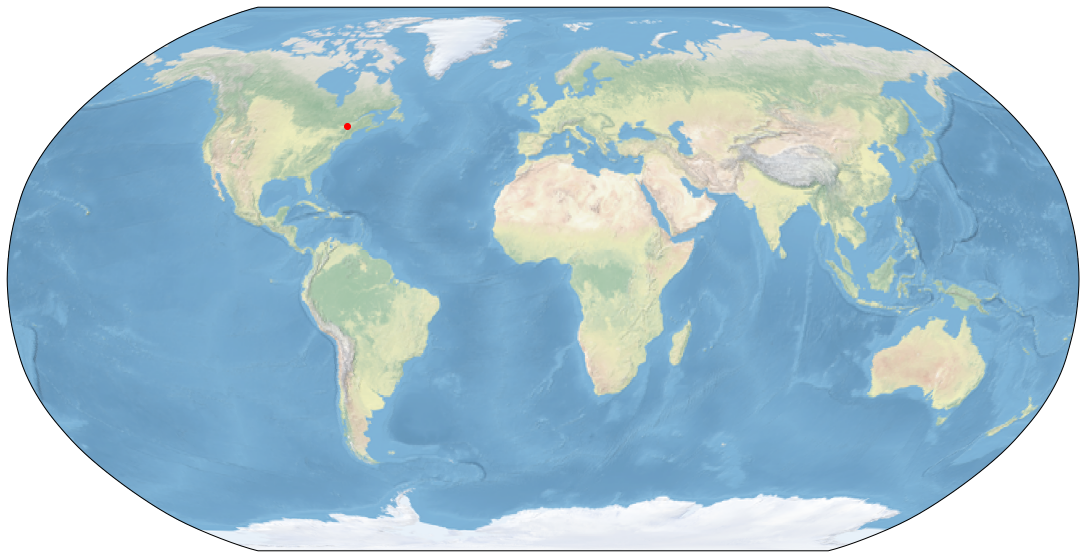

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# fabrique une carte globale
ax.set_global()

ax.stock_img()
#ax.coastlines() #ajoute les côtes

#on place un point rouge sur Montreal
ax.plot(-73.54,45.51, 'ro', transform=ccrs.PlateCarree())

plt.show()



### Folium

Folium est un puissant outil de visualisation rendant possible la conception de cartes interactives.
Elles sont produites par la bibliothèque Javascript Leaflet et sont donc directement intégrables sur des sites internet. Ces cartes sont par exemple utilisées pour des projets disponibles sous licence creative commons tels qu’OpenStreetMap, pour les illustrations cartographiques de Wikipedia ou de médias comme le Wall Street Journal ou le Washington Post.

Voici un exemple de carte :

In [8]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [9]:
import folium


m = folium.Map(location=[45.5236, -122.6750])

In [10]:
m

### Exercice 3
Créer un programme qui affiche une carte avec la position de l'ISS. Ce programme affiche ensuite la météo de l'endroit que l'ISS survole.
Pour cela, vous utiliserez la bibliothèque cartopy ou folium de Python et vous inspirerez des exemples vus précedemment.
Vous pouvez également consulter des exemples de cartes cartopy sur https://scitools.org.uk/cartopy/docs/latest/gallery/ ou de cartes folium sur https://python-visualization.github.io/folium/quickstart.html